In [1]:
import numpy as np
from numpy.random import seed
from numpy.random import randint
from sklearn.cluster import KMeans
from sklearn.datasets import load_svmlight_file
from sklearn.utils import shuffle
from sklearn.utils import random
from lssvm import LSSVC
from collections import defaultdict
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as clrs

import pandas as pd

In [2]:
seed(4)
randint(0, 10, 20)

array([7, 5, 1, 8, 7, 8, 2, 9, 7, 7, 7, 9, 8, 4, 2, 6, 4, 3, 0, 7])

In [16]:
# load data


data_path = '../../Dataset'

# Data loading

data= []
X_all = []
y_all = []
for i in range(1,11):
    data.append(load_svmlight_file(data_path + "/batch" +str(i)+".dat"))
    X_all.append(data[i-1][0].toarray())
    y_all.append(data[i-1][1])
    print(X_all[i-1].shape)
    print(y_all[i-1].shape)
    

#X_all[0], y_all[0] = oversample.fit_resample(X_all[0], y_all[0])

Xmin = X_all[0].min(axis=0)
Xmax = X_all[0].max(axis=0)

def normalize(Xmin, Xmax, X):
    for i in range(0, len(X)):
        for j in range(0, len(X[0])):
            X[i][j] = (X[i][j] - Xmin[j]) / (Xmax[j] - Xmin[j])
    return X

var_all = []
for j in range(len(X_all)):
    X_all[j] = normalize(Xmin,Xmax,X_all[j])
    var_all.append(np.var(X_all[j], axis=0))
    print(var_all[j].shape)
X = X_all[0]
y = y_all[0]
X2 = X_all[1]
y2 = y_all[1]

X_train = X
y_train = y
X_test = X2
y_test = y2



(445, 128)
(445,)
(1244, 128)
(1244,)
(1586, 128)
(1586,)
(161, 128)
(161,)
(197, 128)
(197,)
(2300, 128)
(2300,)
(3613, 128)
(3613,)
(294, 128)
(294,)
(470, 128)
(470,)
(3600, 128)
(3600,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)


2.0    53
1.0    45
3.0    41
6.0    34
5.0    33
4.0    12
dtype: int64

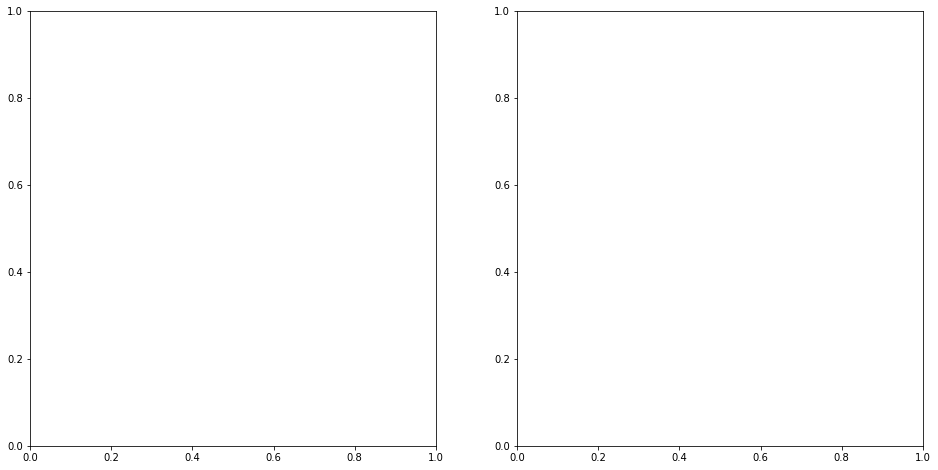

In [12]:
# random sample within each cluster
seed(1)

clusters = 15
kmeans = KMeans(n_clusters=clusters).fit(X)


colors = ['red', 'blue','purple','green','brown','yellow', 'cyan', 'green']


clusterList = defaultdict(list)

for i in range(len(y)):
    clusterList[kmeans.labels_[i]].append((X[i], y[i]))

X_train = []
y_train = []

for key in clusterList:
    sampleIdx = random.sample_without_replacement(n_population=len(clusterList[key]),  n_samples=len(clusterList[key])//2)
    for j in sampleIdx:
        X_train.append(clusterList[key][j][0])
        y_train.append(clusterList[key][j][1])
#print(X_train)
#print(y_train)

X_train_T = np.transpose(X_train)
f, (ax1,ax2) = plt.subplots(1,2, figsize=(16,8))
#ax1.scatter(X_T[0],X_T[1], c=kmeans.labels_)
#ax2.scatter(X_train_T[0],X_train_T[1], c=y_train,cmap=matplotlib.colors.ListedColormap(colors[:6]))

X_train, y_train = shuffle(X_train, y_train)
classes = pd.Index(y_train)
classes.value_counts()

In [32]:

def train_initial(sigma):
    model = LSSVC(gamma=0.5, kernel='rbf', l = 5000000, dTh=0.5, sigma=sigma) # Class instantiation

    model.fit(X_train, np.array(y_train)) # Fitting the model

    for i in range(0,10):

        y_pred2 = model.predict(X_all[i]).flatten()
        count = 0
        for j in range(0, len(y_all[i])):
            if y_all[i][j] != y_pred2[j]:
                count += 1
        print(1-(count / len(y_pred2)))
train_initial(0.7)
    

0.9887640449438202
0.767684887459807
0.29192938209331654
0.1366459627329193
0.40609137055837563
0.1573913043478261
0.2078605037365071
0.1768707482993197
0.28936170212765955
0.35916666666666663


In [18]:
from sklearn.svm import SVC
model2 = SVC()
model2.fit(X_train, y_train)
for i in range(0,10):
    
    y_pred2 = model2.predict(X_all[i]).flatten()
    count = 0
    for j in range(0, len(y_all[i])):
        if y_all[i][j] != y_pred2[j]:
            count += 1
    print(1-(count / len(y_pred2)))

0.9393258426966292
0.5313504823151125
0.5825977301387137
0.6583850931677019
0.4365482233502538
0.5047826086956522
0.4054802103515085
0.2108843537414966
0.28936170212765955
0.3977777777777778


1.0


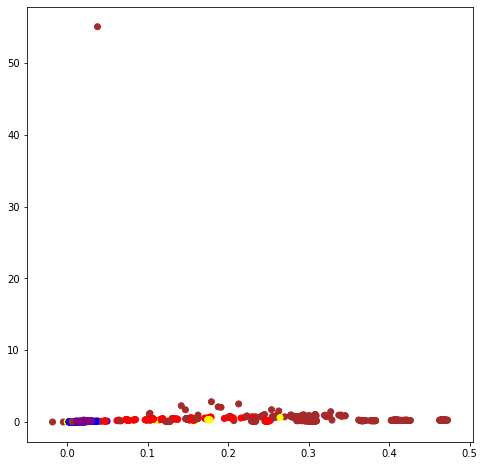

In [24]:
print(y_pred2[0])
fig = plt.figure(figsize=(8,8))
colors = ['red', 'blue','purple','green','brown','yellow']
plt.scatter(X2_T[0],X2_T[1], c=y_pred2 , cmap=matplotlib.colors.ListedColormap(colors))

In [33]:
model = LSSVC(gamma=1, kernel='rbf', l = 1000000,  dTh=0.4, sigma=1) # Class instantiation

model.fit(X_train, np.array(y_train)) # Fitting the model

for i in range(1,11):
    
    y_pred2 = model.fit_online(X_all[i])
    count = 0
    for j in range(0, len(y_all[i])):
        if y_all[i][j] != y_pred2[j]:
            count += 1
    print(1-(count / len(y_pred2)))

#y_pred4 = model.fit_online(X2)

refitting at index 0
refitting at index 1
refitting at index 14
refitting at index 15
refitting at index 18
refitting at index 28
refitting at index 29
refitting at index 31
refitting at index 42
refitting at index 43
refitting at index 45
refitting at index 56
refitting at index 57
refitting at index 59
refitting at index 76
refitting at index 77
refitting at index 78
refitting at index 79
refitting at index 80
refitting at index 89
refitting at index 90
refitting at index 91
refitting at index 92
refitting at index 93
refitting at index 107
refitting at index 108
refitting at index 111
refitting at index 112
refitting at index 121
refitting at index 122
refitting at index 123
refitting at index 124
refitting at index 126
refitting at index 135
refitting at index 136
refitting at index 137
refitting at index 138
refitting at index 140
refitting at index 149
refitting at index 150
refitting at index 151
refitting at index 152
refitting at index 153
refitting at index 154
refitting at i

IndexError: list index out of range

In [26]:
print(len(y_pred4[4]))

1


In [27]:
count = 0
for i in range(0, len(y2)):
    if y2[i] != y_pred4[i]:
        count += 1
print(1-(count / len(y2)))

0.7934083601286174


In [28]:
print(model.t)

[  0.   0.   0.   0. 456.   0.   0.   0.   0.   0.   0.   0. 193.   0.
 112.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 216.   0.   0.   0. 459.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0. 444.   0.   0. 214.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 215.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 460.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.  56.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0. 457.   0.   0.]
